

# Project: No-Show appoitments dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# importing packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline


## Some questions to answer

* Are alcholic people are less likely to show up
* Are diabitic people are less likely to show up
* Does scholarship plays a factor in missing appoitments!
* Does gender plays a factor 

<a id='wrangling'></a>
## Data Wrangling


### Gathering the data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing data

In [3]:
# how many samples are in the dataset
df.shape

(110527, 14)

In [4]:
# what are the column names of the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# is there any null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# finging the count of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# what are the datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# finding more numerical info about each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# finding more numerical info about each column
sum(df.duplicated())

0


### Data Cleaning 


##### The data was mostly clean and ready for analysis as 
* there was no missing values
* there was no duplicated 
* the columns datatypes were correct

##### However some changes will need to be made
   * drop rows where age is negative
   * drop irrelevant columns 
   * split the dataframe into two (showed up, didn't show up)

In [10]:
df[df['Age'] <= 0].shape

(3540, 14)

In [11]:
# dropping rows with negative age

df.drop(df[df['Age'] < 0].index, inplace = True)

In [12]:
#remove irrelevant columns
names = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(columns = names , axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 splitting the dataframe into two, one for patients who showed up and the other for patients who didn't show up

In [13]:
# creating a dataframe for patients who showed up
show = df[df['No-show'] == 'No']
show.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# creating a dataframe for patients who didn't show up
didnt_show = df[df['No-show'] == 'Yes']
didnt_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


# Exploratory Data Analysis

### Research Question 1 (Are alcholic people are less likely to show up)

what is the percentage of alcholic patients who showed up to the appotmint vs who didn't?

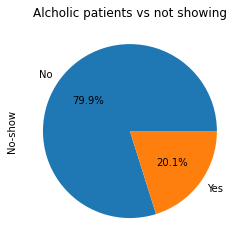

In [15]:
# seprating the rows with alcholic patients 
alcholics = df[df["Alcoholism"] == 1]
alcholics['No-show'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "Alcholic patients vs not showing");

In [16]:
# splitting the df to alcholic (showed up vs who didn't show up)
showed_drunk = show["Alcoholism"] == 1
no_showed_drunk =didnt_show["Alcoholism"] == 1

finding the age distribution for alcholic patients

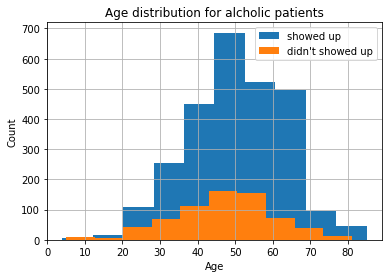

In [17]:
# histogram for the alcholic patients who showed up vs who didn't
show.Age[showed_drunk].hist(alpha = 1, label = "showed up")
didnt_show.Age[no_showed_drunk].hist(alpha = 1, label = "didn't showed up")
plt.title("Age distribution for alcholic patients")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

#### So alcholics are more likely to show up with a normal age distribution

### Research Question 2 (Are diabitic people are less likely to show up)

what is the percentage of diabitic patients who showed up to the appotmint vs who didn't?

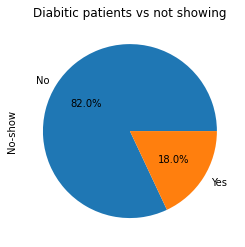

In [18]:
# seprating the rows with diapitic patients
diabitic = df[df["Diabetes"] == 1]
diabitic['No-show'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "Diabitic patients vs not showing");

In [19]:
# splitting the df to diabitic patients (showed up vs who didn't show up)
showed_diabitic = show["Diabetes"] == 1
no_showed_diabitic = didnt_show["Diabetes"] == 1

finding the age distribution for diabitic patients

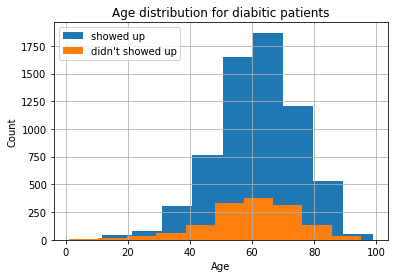

In [20]:
# histogram for the diabitic patients who showed up vs who didn't
show.Age[showed_diabitic].hist(alpha = 1, label = "showed up" )
didnt_show.Age[no_showed_diabitic].hist(alpha = 1, label = "didn't showed up")
plt.title("Age distribution for diabitic patients")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

#### So diabitics are more likely to show up with a normal age distribution

### Research Question 3  (Does scholarship plays a factor in missing appoitments!)

what is the percentage of patients with scholarship who showed up to the appotmint vs who didn't?

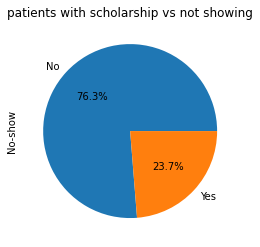

In [21]:
# seprating the rows with scholarship
shol = df[df["Scholarship"] == 1]
shol['No-show'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "patients with scholarship vs not showing");

In [22]:
# splitting the df to patients with scholarship (showed up vs who didn't show up)
s = show["Scholarship"] == 1
no_s = didnt_show["Scholarship"] == 1

finding the age distribution for patients with scholarship

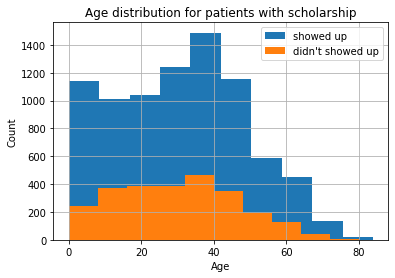

In [23]:
# histogram for the patients with scholarship who showed up vs who didn't
show.Age[s].hist(alpha = 1, label = "showed up")
didnt_show.Age[no_s].hist(alpha = 1, label = "didn't showed up")
plt.title("Age distribution for patients with scholarship" )
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

#### The age distribution is right skewed with less people have scolarships as they get older

### Research Question 3  (Does gender plays a factor)

finding the distribution of gender for patients who showed up

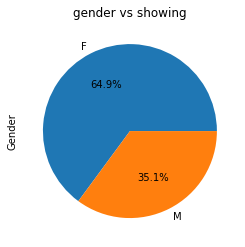

In [24]:
# seprating the rows by gender
show['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "gender vs showing");

finding the distribution of gender for patients who didn't showed up

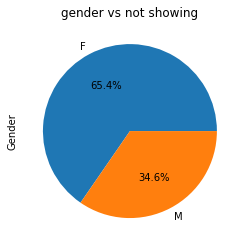

In [25]:
didnt_show['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "gender vs not showing");

##### Gender is not a contributing factor

In [26]:
#finding the most common Neighbourhood to book an appoitment 
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

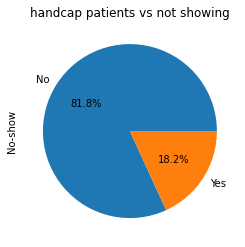

In [27]:
# seprating the df rows by handcap
hand = df[df['Handcap'] > 0]
hand['No-show'].value_counts().plot(kind='pie',autopct='%1.1f%%', title = "handcap patients vs not showing");

<a id='conclusions'></a>
## Conclusions



### Limitations 

* The Age feature are probably incorrect as there is 3540 with 0 age
    * Assume that 0 age is a newborn 
* Handcap featue can hold up several values not a boolean 
* The data shows that there is alocholics with age younger than 10

### Communication 

* Most patients who showed up are females as they are most likely to book 
* Most alcholic patients showes up 
* Most diapitic patients showes up 
* Most hadcap patients showes up 
* age distribution of the patients who showed up is a normal distribution
* patients with scholarship startr showing up at a young age of 1 (right skewed)
* Neighbourhood JARDIM CAMBURI and MARIA ORTIZ are likly to book an apoitment and show up